#  Limpeza e adequação da nomenclatura 

## Entrada dos dados

### Preparando ambiente

In [4]:
#importando bibliotecas 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importando dados de julho de 2022

In [7]:
dados_brutos_julho = pd.read_csv('dados\dados_originais\precos-gasolina-etanol-julho.csv', sep=';')
dados_brutos_julho.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA ADITIVADA,01/07/2022,"7,48",NaN,R$ / litro,VIBRA ENERGIA
1,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA,01/07/2022,"7,38",NaN,R$ / litro,VIBRA ENERGIA
2,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,ETANOL,01/07/2022,"5,99",NaN,R$ / litro,VIBRA ENERGIA
3,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,GASOLINA,01/07/2022,"7,39",NaN,R$ / litro,VIBRA ENERGIA
4,CO,GO,GOIANIA,JUSTINIANO & JUSTINIANO LTDA,04.489.287/0001-16,AVENIDA JOSE LEANDRO DA CRUZ,"2,36","QUADRA 18, LOTE 01",PARQUE AMAZONIA,74840-390,GASOLINA ADITIVADA,01/07/2022,"6,49",NaN,R$ / litro,IPIRANGA


### Importando dados de agosto de 2022

In [8]:
dados_brutos_agosto = pd.read_csv('dados\dados_originais\precos-gasolina-etanol-agosto.csv', sep=';')
dados_brutos_agosto.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,ARAPIRACA,AUTO POSTO M M GARROTE LTDA,08.738.994/0001-50,RODOVIA AL-220,5848,KM 96,BOM SUCESSO,57309-035,ETANOL,01/08/2022,"4,79",NaN,R$ / litro,VIBRA ENERGIA
1,NE,AL,ARAPIRACA,AUTO POSTO M M GARROTE LTDA,08.738.994/0001-50,RODOVIA AL-220,5848,KM 96,BOM SUCESSO,57309-035,GASOLINA,01/08/2022,"5,59",NaN,R$ / litro,VIBRA ENERGIA
2,NE,AL,ARAPIRACA,AUTO POSTO MASSARANDUBA LTDA.,07.248.398/0001-29,RODOVIA AL 220,4698,NaN,PLANALTO,57308-000,GASOLINA ADITIVADA,01/08/2022,"5,99",NaN,R$ / litro,BRANCA
3,NE,AL,ARAPIRACA,AUTO POSTO MASSARANDUBA LTDA.,07.248.398/0001-29,RODOVIA AL 220,4698,NaN,PLANALTO,57308-000,ETANOL,01/08/2022,"4,99",NaN,R$ / litro,BRANCA
4,NE,AL,ARAPIRACA,AUTO POSTO MASSARANDUBA LTDA.,07.248.398/0001-29,RODOVIA AL 220,4698,NaN,PLANALTO,57308-000,GASOLINA,01/08/2022,"5,79",NaN,R$ / litro,BRANCA


## União, adequação de dados e de nomenclatura

### Modificação do padrão das datas

In [9]:
#dados de julho
dados_brutos_julho['Data da Coleta'] = pd.to_datetime(dados_brutos_julho['Data da Coleta'], dayfirst=True)
dados_brutos_julho['Data da Coleta'].head()

0   2022-07-01
1   2022-07-01
2   2022-07-01
3   2022-07-01
4   2022-07-01
Name: Data da Coleta, dtype: datetime64[ns]

In [10]:
#dados de julho
dados_brutos_julho['Data da Coleta'] = pd.to_datetime(dados_brutos_julho['Data da Coleta'], dayfirst=True)
dados_brutos_julho['Data da Coleta'].head()

0   2022-07-01
1   2022-07-01
2   2022-07-01
3   2022-07-01
4   2022-07-01
Name: Data da Coleta, dtype: datetime64[ns]

### União dos dataframes 

In [11]:
lista_dados = [dados_brutos_julho ,dados_brutos_agosto]
dados_brutos = pd.concat(lista_dados, ignore_index= True, verify_integrity=True)

### Momenclatura das colunas 

In [13]:
#modificacao do nome de columas
dados_brutos.columns = dados_brutos.columns.str.replace('- ','')
dados_brutos.columns = dados_brutos.columns.str.replace(' ','_')
dados_brutos.columns = dados_brutos.columns.str.lower()
dados_brutos.columns

Index(['regiao_sigla', 'estado_sigla', 'municipio', 'revenda',
       'cnpj_da_revenda', 'nome_da_rua', 'numero_rua', 'complemento', 'bairro',
       'cep', 'produto', 'data_da_coleta', 'valor_de_venda', 'valor_de_compra',
       'unidade_de_medida', 'bandeira'],
      dtype='object')

## Verificação de valores 

### Adequação dos valores da coluna valor_de_venda

In [14]:
#tocando vigula por ponto e nudando de string para float
valores_virgula = dados_brutos['valor_de_venda'].tolist()
valores_ponto = [x.replace(',', '.') for x in valores_virgula]
dados_brutos['valor_de_venda'] = valores_ponto
dados_brutos['valor_de_venda'] = dados_brutos['valor_de_venda'].astype(float)

In [15]:
dados_brutos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127176 entries, 0 to 127175
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   regiao_sigla       127176 non-null  object 
 1   estado_sigla       127176 non-null  object 
 2   municipio          127176 non-null  object 
 3   revenda            127176 non-null  object 
 4   cnpj_da_revenda    127176 non-null  object 
 5   nome_da_rua        127176 non-null  object 
 6   numero_rua         127105 non-null  object 
 7   complemento        27079 non-null   object 
 8   bairro             126764 non-null  object 
 9   cep                127176 non-null  object 
 10  produto            127176 non-null  object 
 11  data_da_coleta     127176 non-null  object 
 12  valor_de_venda     127176 non-null  float64
 13  valor_de_compra    0 non-null       float64
 14  unidade_de_medida  127176 non-null  object 
 15  bandeira           127176 non-null  object 
dtypes:

### Verificação colunas

In [16]:
dados_brutos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127176 entries, 0 to 127175
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   regiao_sigla       127176 non-null  object 
 1   estado_sigla       127176 non-null  object 
 2   municipio          127176 non-null  object 
 3   revenda            127176 non-null  object 
 4   cnpj_da_revenda    127176 non-null  object 
 5   nome_da_rua        127176 non-null  object 
 6   numero_rua         127105 non-null  object 
 7   complemento        27079 non-null   object 
 8   bairro             126764 non-null  object 
 9   cep                127176 non-null  object 
 10  produto            127176 non-null  object 
 11  data_da_coleta     127176 non-null  object 
 12  valor_de_venda     127176 non-null  float64
 13  valor_de_compra    0 non-null       float64
 14  unidade_de_medida  127176 non-null  object 
 15  bandeira           127176 non-null  object 
dtypes:

Aparentemente 'valor_de_compra' esta vazia e poucos valores em 'complemento'

In [18]:
#verificando se a coluna esta vazia 
dados_brutos.valor_de_compra.unique()

array([nan])

In [19]:
dados_brutos.drop(columns=['valor_de_compra'], inplace=True)

In [20]:
dados_brutos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127176 entries, 0 to 127175
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   regiao_sigla       127176 non-null  object 
 1   estado_sigla       127176 non-null  object 
 2   municipio          127176 non-null  object 
 3   revenda            127176 non-null  object 
 4   cnpj_da_revenda    127176 non-null  object 
 5   nome_da_rua        127176 non-null  object 
 6   numero_rua         127105 non-null  object 
 7   complemento        27079 non-null   object 
 8   bairro             126764 non-null  object 
 9   cep                127176 non-null  object 
 10  produto            127176 non-null  object 
 11  data_da_coleta     127176 non-null  object 
 12  valor_de_venda     127176 non-null  float64
 13  unidade_de_medida  127176 non-null  object 
 14  bandeira           127176 non-null  object 
dtypes: float64(1), object(14)
memory usage: 14.6+ MB


verificando coluna complemento

In [23]:
dados_brutos.complemento.unique()

array([nan, 'LETRA A', 'QUADRA 18, LOTE 01', ..., 'GARA6EM',
       'KM    615  280 M', 'LOTE  00013                     0002'],
      dtype=object)

In [24]:
dados_brutos.drop(columns=['complemento'], inplace=True)

## Verificando valores destoantes 

In [25]:
dados_brutos.valor_de_venda.describe()

count    127176.000000
mean          5.355503
std           0.860449
min           2.890000
25%           4.880000
50%           5.490000
75%           5.890000
max           9.270000
Name: valor_de_venda, dtype: float64

<AxesSubplot:ylabel='Frequency'>

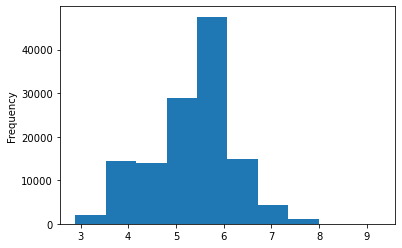

In [26]:
dados_brutos.valor_de_venda.plot(kind='hist')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='valor_de_venda'>

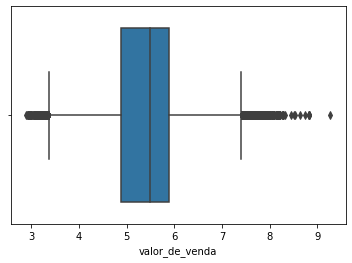

In [27]:
sns.boxplot(dados_brutos.valor_de_venda)

### Verificando produtos 

In [29]:
dados_brutos.produto.unique()

array(['GASOLINA ADITIVADA', 'GASOLINA', 'ETANOL'], dtype=object)

Gasolina

In [30]:
dados_brutos.query("produto == 'GASOLINA'").describe()

,valor_de_venda
count,48341.000000
mean,5.711579
std,0.528368
min,4.130000
25%,5.380000
50%,5.670000
75%,5.990000
max,8.750000


<AxesSubplot:xlabel='valor_de_venda'>

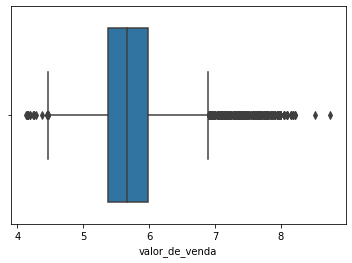

In [32]:
sns.boxplot(dados_brutos.query("produto == 'GASOLINA'").valor_de_venda)

In [35]:
dados_brutos.query("valor_de_venda > 7").estado_sigla.unique()

array(['ES', 'PI', 'RJ', 'AL', 'AM', 'BA', 'CE', 'MA', 'MG', 'PA', 'PB',
       'PE', 'RN', 'RS', 'SE', 'SP', 'TO', 'MS', 'PR', 'SC', 'GO', 'RO',
       'AC', 'MT', 'RR'], dtype=object)

# Salvando e verificando arquivo salvo

## Salvando em csv

In [38]:
dados_brutos.to_csv('dados\dados_limpos\precos_gasolina_etanol_julho_agosto.csv', sep=',', index=False)

## Verificando arquivo salvo

In [39]:
dados_novo_arquivo = pd.read_csv('dados\dados_limpos\precos_gasolina_etanol_julho_agosto.csv')
dados_novo_arquivo.head()

,regiao_sigla,estado_sigla,municipio,revenda,cnpj_da_revenda,nome_da_rua,numero_rua,bairro,cep,produto,data_da_coleta,valor_de_venda,unidade_de_medida,bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,LACE,29703-030,GASOLINA ADITIVADA,2022-07-01 00:00:00,7.48,R$ / litro,VIBRA ENERGIA
1,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,LACE,29703-030,GASOLINA,2022-07-01 00:00:00,7.38,R$ / litro,VIBRA ENERGIA
2,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LACE,29703-055,ETANOL,2022-07-01 00:00:00,5.99,R$ / litro,VIBRA ENERGIA
3,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LACE,29703-055,GASOLINA,2022-07-01 00:00:00,7.39,R$ / litro,VIBRA ENERGIA
4,CO,GO,GOIANIA,JUSTINIANO & JUSTINIANO LTDA,04.489.287/0001-16,AVENIDA JOSE LEANDRO DA CRUZ,"2,36",PARQUE AMAZONIA,74840-390,GASOLINA ADITIVADA,2022-07-01 00:00:00,6.49,R$ / litro,IPIRANGA


In [40]:
dados_novo_arquivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127176 entries, 0 to 127175
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   regiao_sigla       127176 non-null  object 
 1   estado_sigla       127176 non-null  object 
 2   municipio          127176 non-null  object 
 3   revenda            127176 non-null  object 
 4   cnpj_da_revenda    127176 non-null  object 
 5   nome_da_rua        127176 non-null  object 
 6   numero_rua         127105 non-null  object 
 7   bairro             126764 non-null  object 
 8   cep                127176 non-null  object 
 9   produto            127176 non-null  object 
 10  data_da_coleta     127176 non-null  object 
 11  valor_de_venda     127176 non-null  float64
 12  unidade_de_medida  127176 non-null  object 
 13  bandeira           127176 non-null  object 
dtypes: float64(1), object(13)
memory usage: 13.6+ MB
